In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load the dataset
dataset = pd.read_csv('../../data/raw/revisioned_first_set.csv')

In [3]:
dataset['Skills Required'] = dataset['Skills Required'].str.split(', ')

In [4]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['Job Role Title'])

## Tell the skillset required for the specific job role

Similar job roles found:
Job Role: Data Analyst
Skills: SQL,  Excel,  Data Visualization,  Statistics,  Data Cleaning,  Tableau,  Power BI 

Job Role: Business Intelligence Analyst
Skills: SQL,  Tableau,  Power BI,  Data Visualization,  Business Analysis,  Data Reporting 

Job Role: Senior Data Analyst
Skills: SQL,  Excel,  Tableau,  Data Visualization,  Data Cleaning,  Data Analysis 



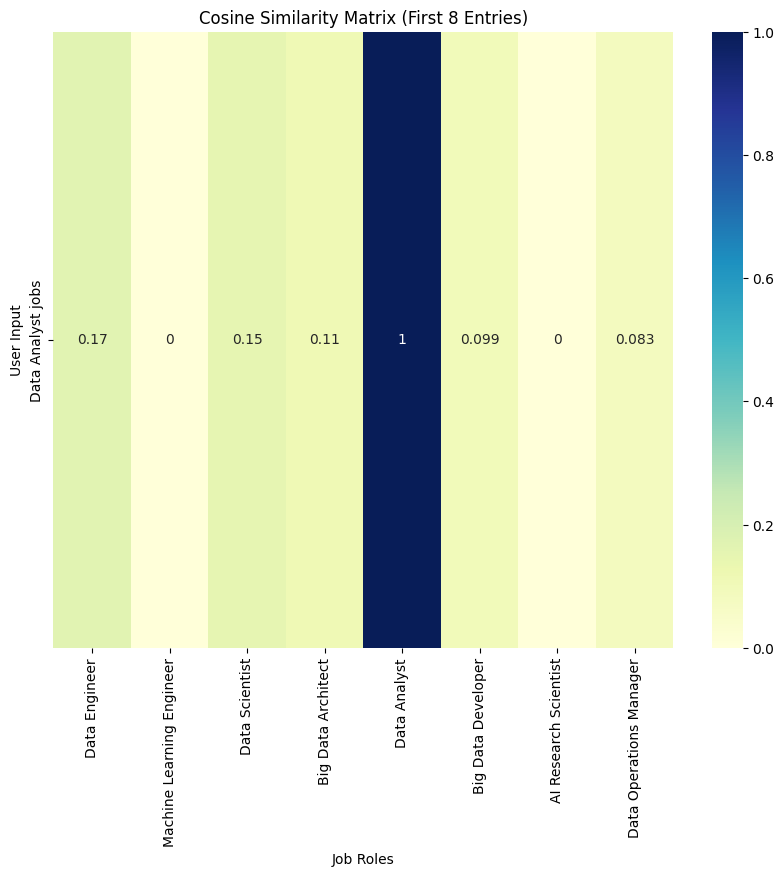

In [11]:
user_input = input("Enter a job role: ")
exact_match = dataset[dataset['Job Role Title'].str.lower() == user_input.lower()]

if not exact_match.empty:
    print("Exact match found!")
    print(f"Job Role: {exact_match['Job Role Title'].values[0]}")
    print(f"Skills: {', '.join(exact_match['Skills Required'].values[0])}")
else:
    user_input_vector = tfidf_vectorizer.transform([user_input])
    similarities = cosine_similarity(user_input_vector, tfidf_matrix)
    threshold = 0.2

    similar_roles = dataset[similarities[0] > threshold]

    if not similar_roles.empty:
        print("Similar job roles found:")
        for index, row in similar_roles.head(3).iterrows():
            print(f"Job Role: {row['Job Role Title']}")
            print(f"Skills: {', '.join(row['Skills Required'])} \n")
    else:
        print("No matching job roles found.")

    subset_dataset = dataset.head(8)
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarities[:, subset_dataset.index], cmap='YlGnBu', annot=True, xticklabels=subset_dataset['Job Role Title'], yticklabels=[user_input])
    plt.title('Cosine Similarity Matrix (First 8 Entries)')
    plt.xlabel('Job Roles')
    plt.ylabel('User Input')
    plt.savefig('../visualization/cosine_similarity.png')
    # Ensure the plot is displayed
    plt.show(block=True)

In the above code, we used several concepts and libraries for the task of finding job roles based on user input and then displaying the combined skills for those roles. Here are the key concepts and libraries used:

1. **Pandas:** We used the Pandas library to load and manipulate the dataset stored in a CSV file. Pandas provides data structures and functions for data analysis and manipulation, making it easy to work with tabular data.

2. **NLP (Natural Language Processing):** NLP concepts are used for tokenizing and processing text data. In particular, we tokenized the job roles, user input, and skills to work with text-based information.

3. **TF-IDF (Term Frequency-Inverse Document Frequency):** We used TF-IDF vectorization to represent the job roles as numerical vectors. This technique is commonly used in text mining and information retrieval to convert text data into a numerical format for similarity calculations.

4. **Cosine Similarity:** Cosine similarity is a metric used to determine how similar two vectors (in our case, job roles) are in a high-dimensional space. We calculated the cosine similarity between job roles to identify similar job roles based on their textual content.

5. **Data Preprocessing:** We preprocessed the dataset by splitting the skills in each job role into a list. This allowed us to work with individual skills for each role.

6. **Matching and Filtering:** We matched user input against job roles based on common words or tokens. If at least one word from the user input matched with any word in a job role, we considered it a match.

7. **Thresholding:** We applied a similarity threshold to filter out job roles that are considered similar based on the cosine similarity scores.

8. **Data Structures:** We used Python dictionaries and sets to organize and store information. Dictionaries were used to map job roles to their corresponding skills, and sets were used to combine and store unique skills.

9. **Looping and Iteration:** We used loops to iterate through job roles and their similarities, as well as to iterate through tokens in the user input.

10. **Conditional Statements:** We used conditional statements to filter and display the results, such as showing the combined skills for matched job roles.

These concepts and libraries were combined to create a program that takes user input, finds matching job roles, identifies similar roles, and displays the combined skills for those roles.

In [6]:
# def jaccard_similarity(skills_set1, skills_set2):
#     set1 = set(skills_set1)
#     set2 = set(skills_set2)
#     intersection = len(set1.intersection(set2))
#     union = len(set1) + len(set2) - intersection
#     return intersection / union if union > 0 else 0

# user_skills_input = input("Enter your skills separated by commas: ")
# user_skills = [skill.strip() for skill in user_skills_input.split(',')]

# best_match = None
# best_similarity = 0

# for index, row in dataset.iterrows():
#     dataset_skills = row['Skills Required']
#     similarity = jaccard_similarity(user_skills, dataset_skills)
    
#     if similarity > best_similarity:
#         best_similarity = similarity
#         best_match = row['Job Role Title']

# if best_match:
#     print(f"Best match found!")
#     print(f"Job Role: {best_match}")
#     print(f"Similarity Score: {best_similarity:.2%}")
# else:
#     print("No matching job roles found.")


## Tell the job role matching the skillset

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_best_match(user_input, dataset):
    # Check for an exact match
    exact_match = dataset[dataset['Job Role Title'].str.lower() == user_input.lower()]

    if not exact_match.empty:
        return exact_match.iloc[0]['Job Role Title']

    # If no exact match, find the best match based on word similarity
    vectorizer = CountVectorizer()
    skills_matrix = vectorizer.fit_transform(dataset['Skills Required'].apply(lambda x: ' '.join(x)))
    user_input_vector = vectorizer.transform([user_input])

    similarities = cosine_similarity(user_input_vector, skills_matrix)

    best_match_index = similarities.argmax()
    best_match = dataset.iloc[best_match_index]['Job Role Title']


    pickle.dump(vectorizer, open('../../models/vectorizer.pkl', 'wb'))
    pickle.dump(skills_matrix, open('../../models/skills_matrix.pkl', 'wb'))
    
    return best_match

user_skills_input = input("Enter your skills separated by commas: ")
user_skills = [skill.strip() for skill in user_skills_input.split(',')]

best_matched_job = get_best_match(user_skills_input, dataset)

if best_matched_job:
    print("Best match found!")
    print(f"Job Role: {best_matched_job}")
else:
    print("No matching job roles found.")


Best match found!
Job Role: Data Engineer II


In [8]:
pickle.dump(tfidf_vectorizer, open('../../models/model.pkl', 'wb'))
pickle.dump(tfidf_matrix, open('../../models/tfidf_matrix.pkl', 'wb'))
